In [1]:
#importing the required libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
%matplotlib inline
import matplotlib.lines as lines
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('caribbean cluster.csv')

In [3]:

df['Population'] = df['Population'].str.replace(',', '')

df['Land Size (km2)'] = df['Land Size (km2)'].str.replace(',', '')
df = df.dropna()

In [4]:
#Ensuring that the values with numbers are read as numbers
df['Population'] = df['Population'].astype(float)
df['Land Size (km2)'] = df['Land Size (km2)'].astype(float)
df['Crime Index'] = df['Crime Index'].astype(float)
df["GDP ($US)"] = df['GDP ($US)'].astype(float)

In [5]:
#Removing the country names from the columns with numerical values
data_for_clustering = df.iloc[:, 1:]

In [6]:
df = df.dropna()

In [7]:
#Applying kmeans
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=3, init='k-means++', max_iter=600, random_state=42))
kmeans.fit(data_for_clustering)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.predict(data_for_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


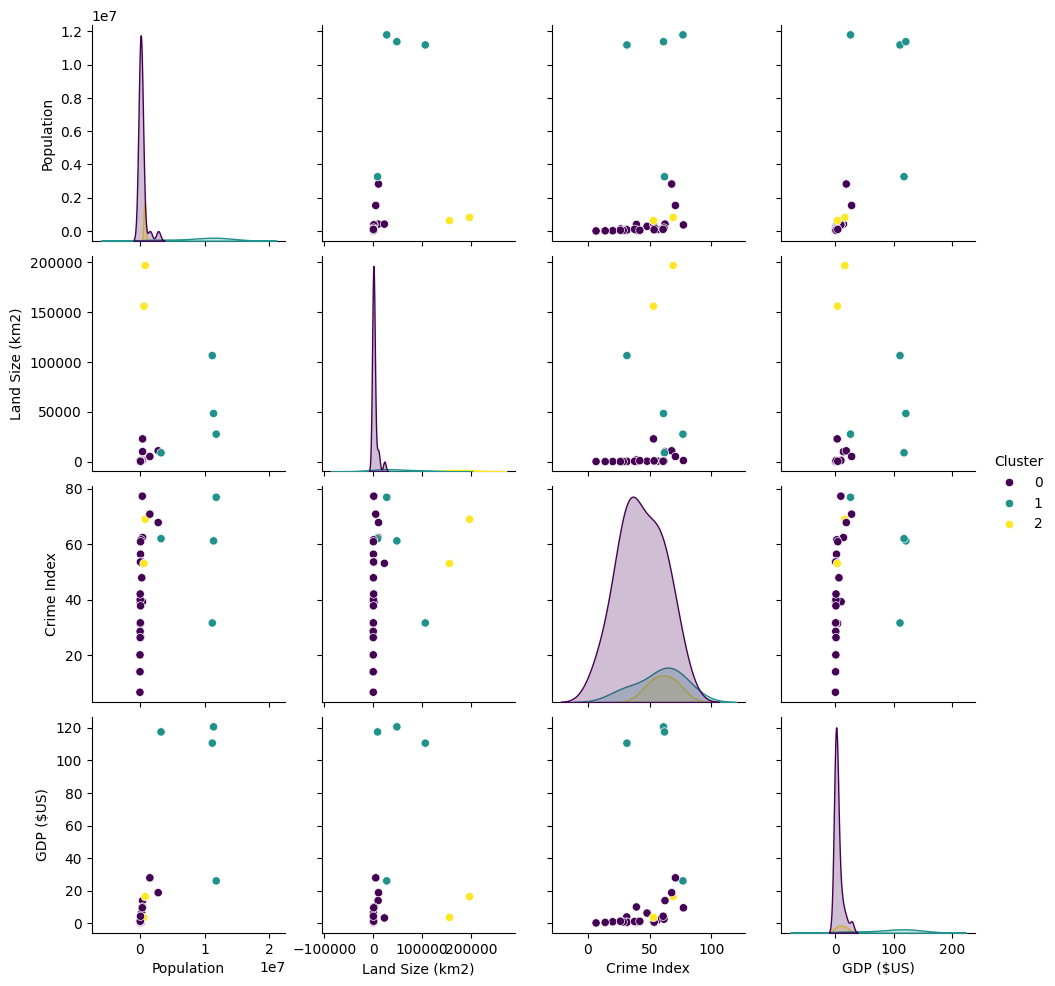

In [8]:
# Visualize the clusters using a pair plot (compare all columns)
import seaborn as sns
sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde')
plt.show()

In [9]:
#There seems to be stronger clusters in the graph for Population vs land size, and land size and gdp so those graphs will be focused on
new_df = df[['Population', 'Land Size (km2)']]
X = new_df.values

In [10]:
# Calculating WCSS for different values of k
wcss = []
for i in range(1, 7):
 kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)

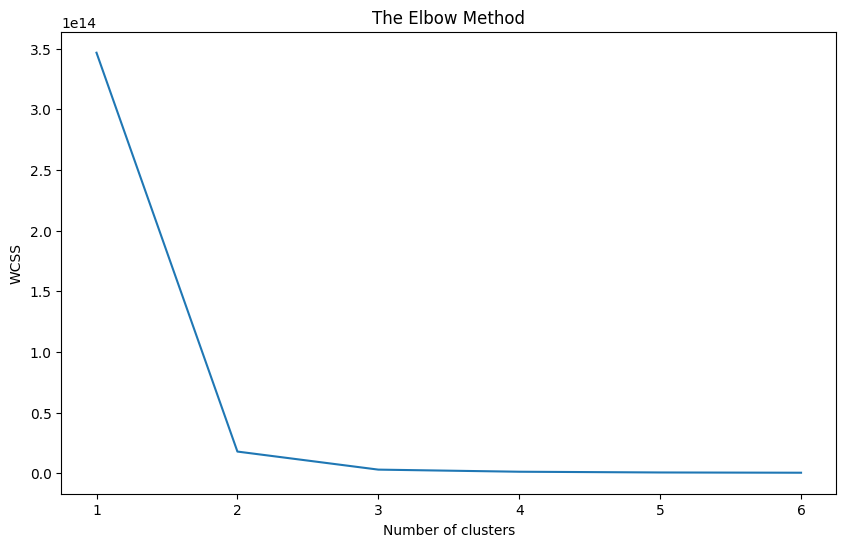

In [11]:
# Plotting the results onto a line graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


In [12]:
#Applying kmeans
#The Elbow Method says that 3 is the best number of clusters when plotting 'Population' against 'Land Size (km2)'
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
# Add cluster labels to the DataFrame
df['Cluster'] = y_kmeans
df.to_csv('Land size vs population.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


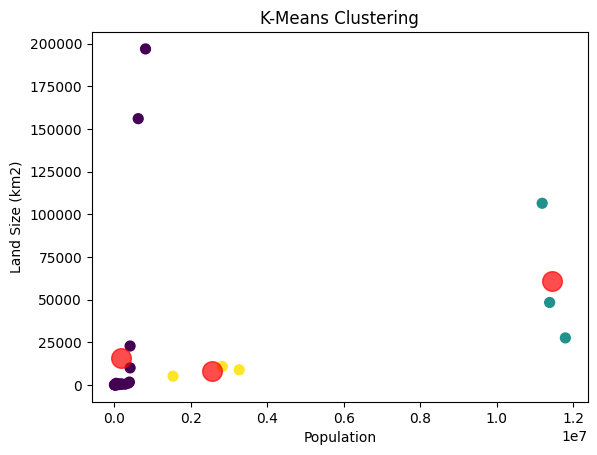

In [13]:
# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Population')
plt.ylabel('Land Size (km2)')
plt.show()

In [14]:
#There seems to be stronger clusters in the graph for Population vs land size, and land size and gdp so those graphs will be focused on
new_df = df[['GDP ($US)', 'Land Size (km2)']]
X = new_df.values

In [15]:
# Calculating WCSS for different values of k
wcss = []
for i in range(1, 7):
 kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)

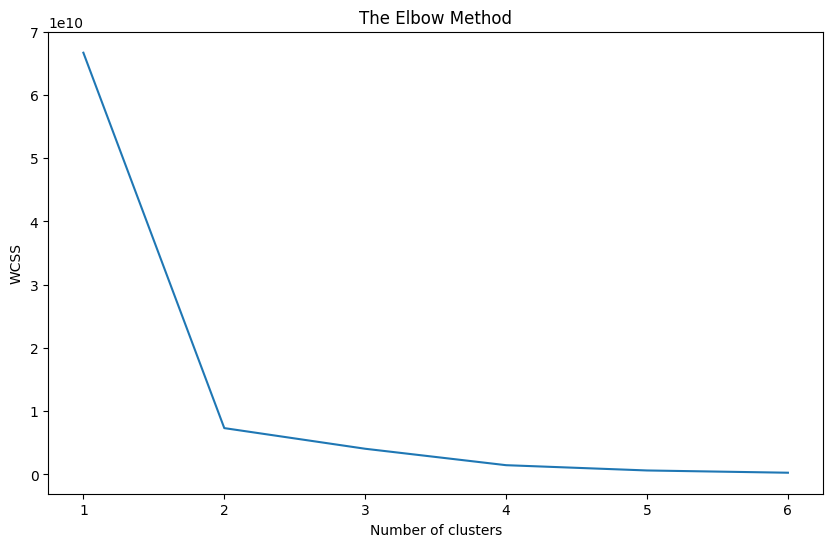

In [16]:
# Plotting the results onto a line graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [17]:
#Applying kmeans
#The Elbow Method says that 4 is the best number of clusters when plotting 'Population' against 'Land Size (km2)'
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
# Add cluster labels to the DataFrame
df['Cluster'] = y_kmeans
df.to_csv('land size vs gdp.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


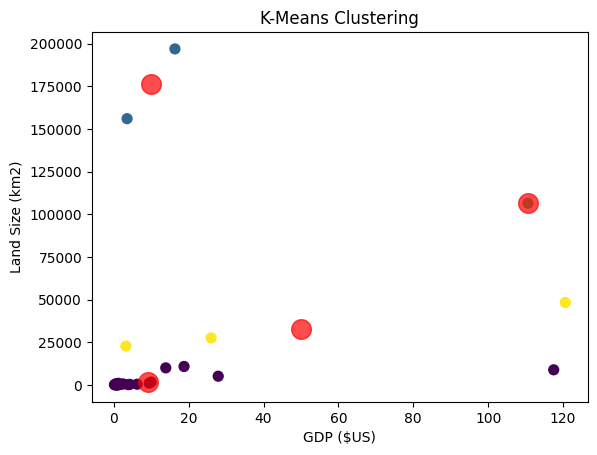

In [18]:
# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('GDP ($US)')
plt.ylabel('Land Size (km2)')
plt.show()